In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('HR_comma_sep.csv')

In [5]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [6]:
pd.value_counts(df['left'])

0    11428
1     3571
Name: left, dtype: int64

### Looking for missing values

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

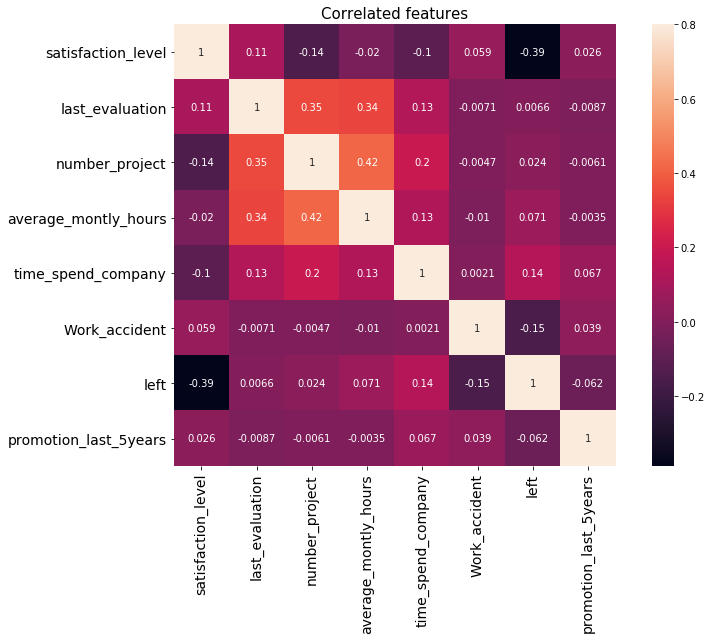

In [8]:
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,square=True,vmax=0.8)

plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.title('Correlated features',fontsize=15)
plt.tight_layout()
plt.show()

If we look carefully we will see that, there are three values with a notable correlation between them

That is, 1) Last Evaluation

2) Average Monthly Hours

3) Number Projects

### Exploring the Data

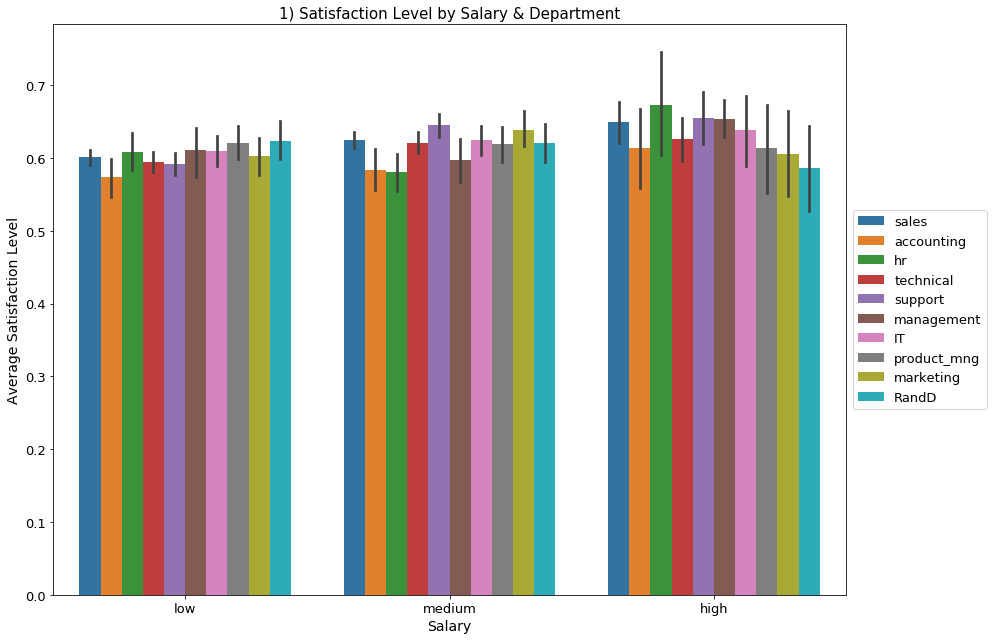

In [9]:
f,ax = plt.subplots(figsize=(12,9))
sns.barplot(x='salary',y='satisfaction_level',data=df,hue='sales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':13})
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Average Satisfaction Level',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('1) Satisfaction Level by Salary & Department',fontsize=15)
plt.tight_layout()
plt.show()

I think that employees in Accounting department are the tail in low and medium salary scale. HR department has the most satisfied employees in the high scale. Also, product management employees have​ a stable satisfaction level in all scales.

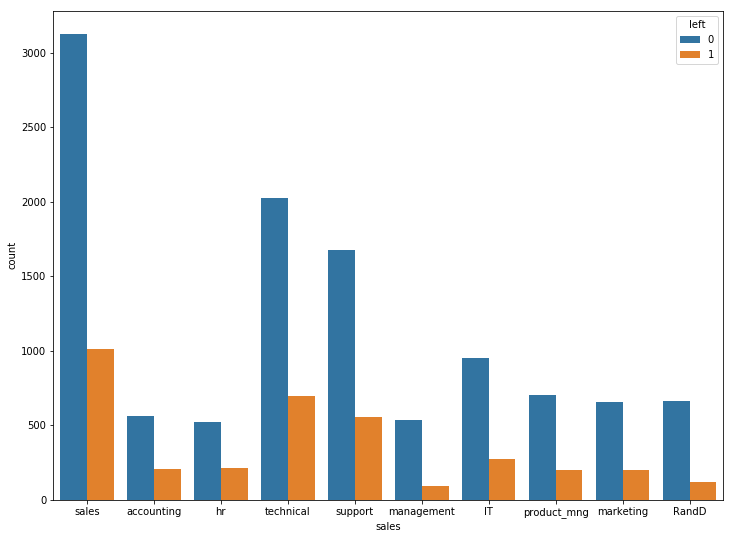

In [10]:
f,ax = plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='sales',hue='left')

However, we see that Sales department have the biggest number of employees who left their job. Check Accounting department staff leaks, are fewer than Sales dept. Although, the average satisfaction level is bigger in Sales dept than Accounting in the salary scale. What is going on here? Salary is not the main reason, for employees, to leave their company!



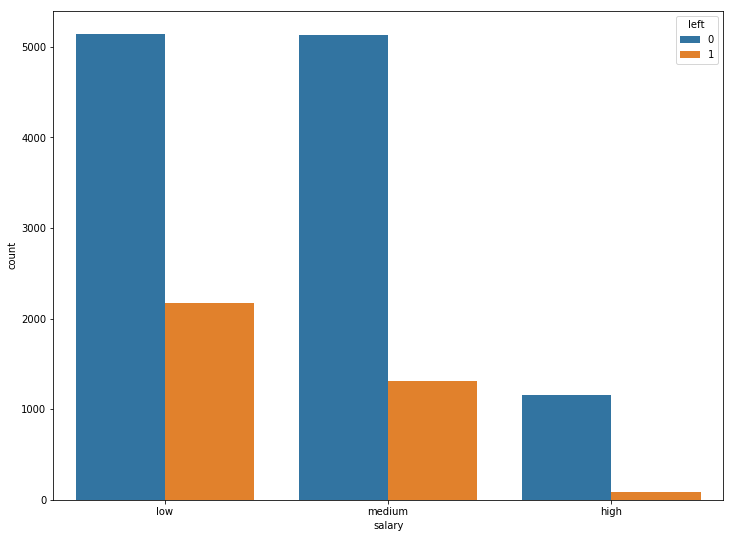

In [11]:
f,ax = plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='salary',hue='left')

This means that salary is not the only reason for employee leakage.

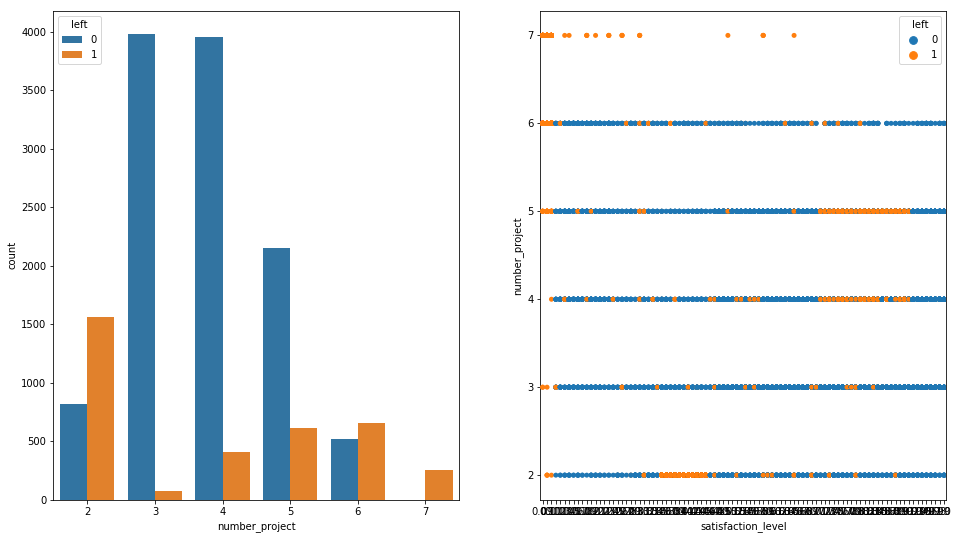

In [12]:
f,ax = plt.subplots(figsize=(16,9))
plt.subplot(1,2,1)
sns.countplot(data=df,x='number_project',hue='left')

plt.subplot(1,2,2)
sns.stripplot(x='satisfaction_level',y='number_project',hue='left',
data=df)

Whoever managed to deal with 7 projects finally left the company. All these employees have low satisfaction level. Employees with 6 projects who left their job are more than the others who stayed. Look at y-axis in the​ stripplot. We see a few "left" dots. This means that dots are cramped at the low satisfaction levels. We should take into account that more than 1500 (>10%) employees with two (2) projects left their job. Their satisfaction level is below the average.

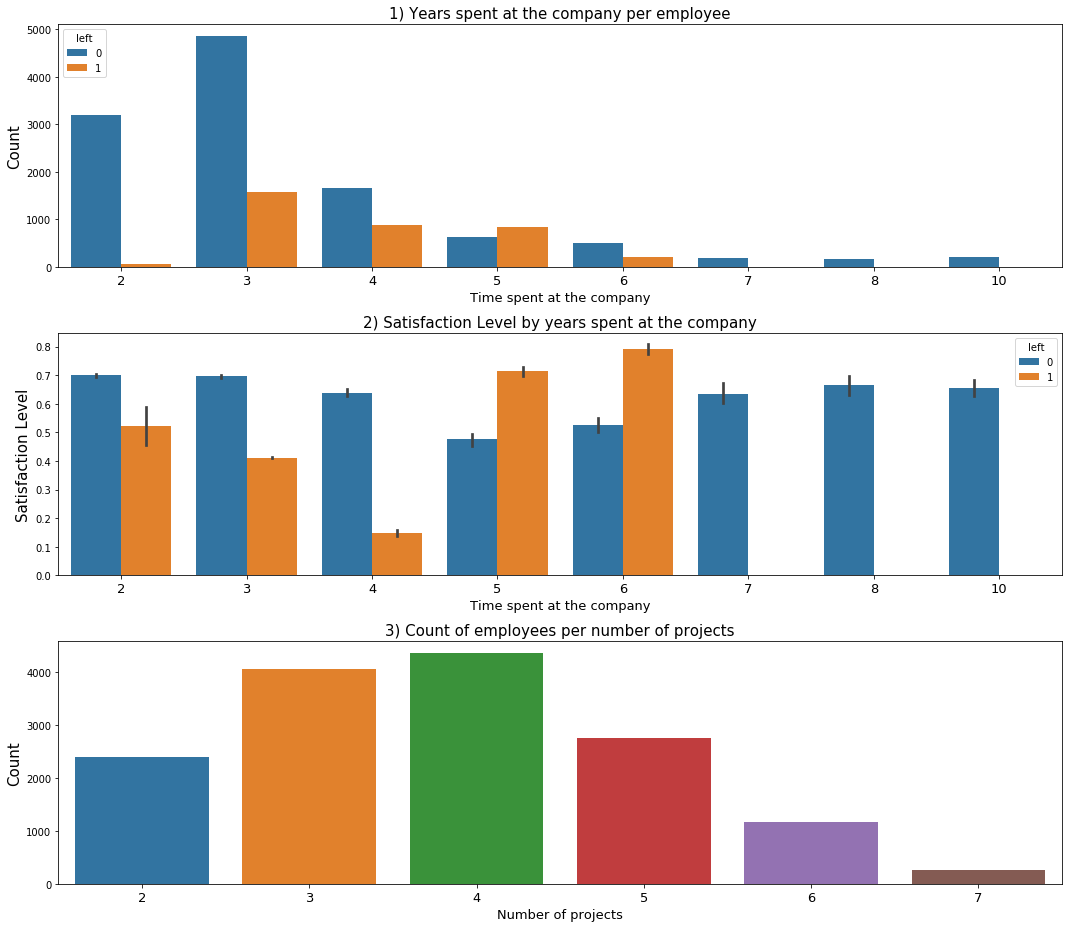

In [13]:
f,ax = plt.subplots(figsize=(15,13))
plt.subplot(3,1,1)
sns.countplot(x='time_spend_company',hue='left',data=df)
plt.xlabel('Time spent at the company',fontsize=13)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.title('1) Years spent at the company per employee',fontsize=15)

plt.subplot(3,1,2)
sns.barplot(x='time_spend_company',y='satisfaction_level',hue='left',data=df)
plt.xlabel('Time spent at the company',fontsize=13)
plt.ylabel('Satisfaction Level',fontsize=15)
plt.xticks(fontsize=13)
plt.title('2) Satisfaction Level by years spent at the company',fontsize=15)

plt.subplot(3,1,3)
sns.countplot(x='number_project',data=df)
plt.xlabel('Number of projects',fontsize=13)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.title('3) Count of employees per number of projects',fontsize=15)

plt.tight_layout()
plt.show()

In the First plot we see that employees who had worked over 7+ years at the company had stayed at their position and in the second plot we can also see that these employees also have a good satisfaction level.
In the third plot we see that most of the employees have been occupied in 3 or 4 projects but in comparison with the first plot most of the employees who had left the jobs also had 3,4 or 5 projects.

According to the second plot employees with 5 or 6 projects and having satisfaction level above average have also left th company.

In [14]:
#Number of projects
z=df.loc[df['time_spend_company']>=7]['number_project'].value_counts()
print(z)

3    214
4    186
5     94
2     38
6     32
Name: number_project, dtype: int64


In [15]:
#Department
w = df.loc[df['time_spend_company']>=7]['sales'].value_counts()
print(w)
print('Total : ' , w.sum())

sales          216
management     122
marketing       42
support         38
IT              38
product_mng     36
technical       32
accounting      24
RandD           10
hr               6
Name: sales, dtype: int64
('Total : ', 564)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

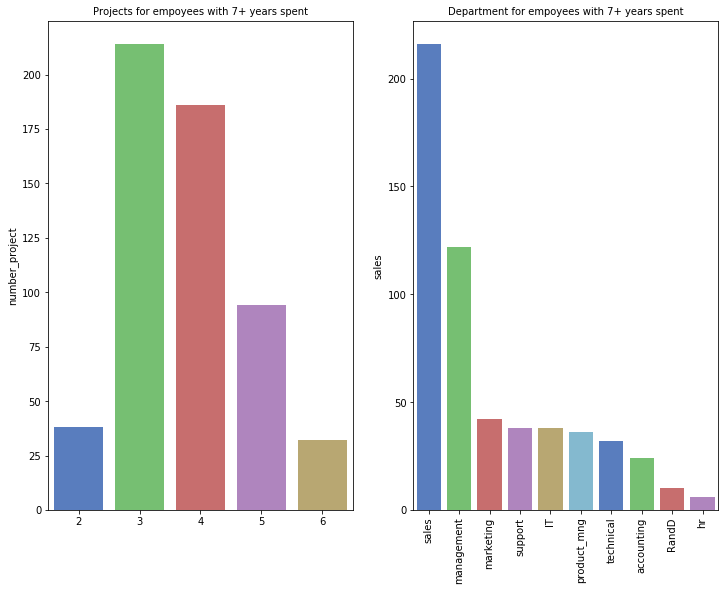

In [16]:
f,ax = plt.subplots(figsize=(12,9))
plt.subplot(1,2,1)
sns.barplot( z.index,z,palette='muted')
plt.title('Projects for empoyees with 7+ years spent',fontsize=10)

plt.subplot(1,2,2)
sns.barplot(w.index,w,palette='muted')
plt.title('Department for empoyees with 7+ years spent',fontsize=10)
plt.xticks(rotation=90)

Most of the employees are distributed in 3 or 4 projects and mainly working in sales and management.

### Employees with 7+ year experience

In [17]:
p=df[df['time_spend_company']>=7]['promotion_last_5years'].value_counts()
print("Got Promoted : ", p[0])
print("Not Promoted : ",p[1])

('Got Promoted : ', 502)
('Not Promoted : ', 62)


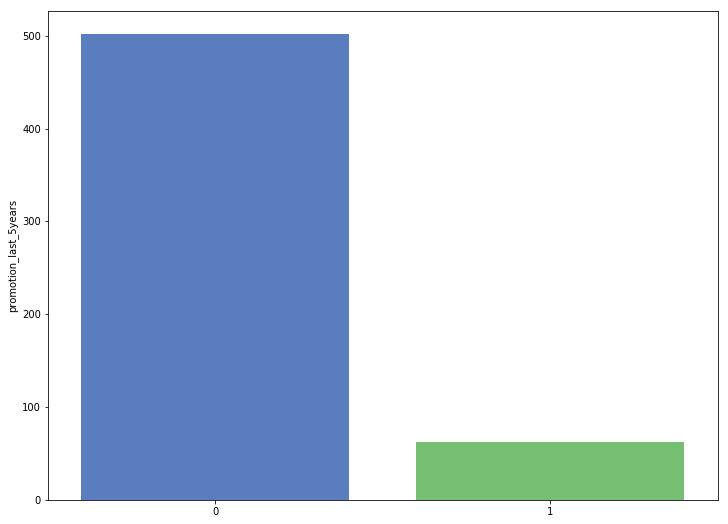

In [18]:
f, ax = plt.subplots(figsize=(12,9))
sns.barplot(p.index,p,palette='muted')

#### work accident - affects leave or stay decision ?

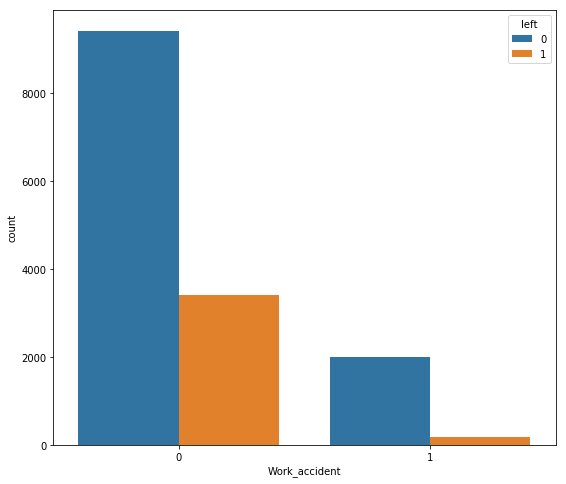

In [19]:
f,ax = plt.subplots(figsize=(9,8))
sns.countplot(x='Work_accident',hue='left',data=df)

Only a few with a work accident left their job.

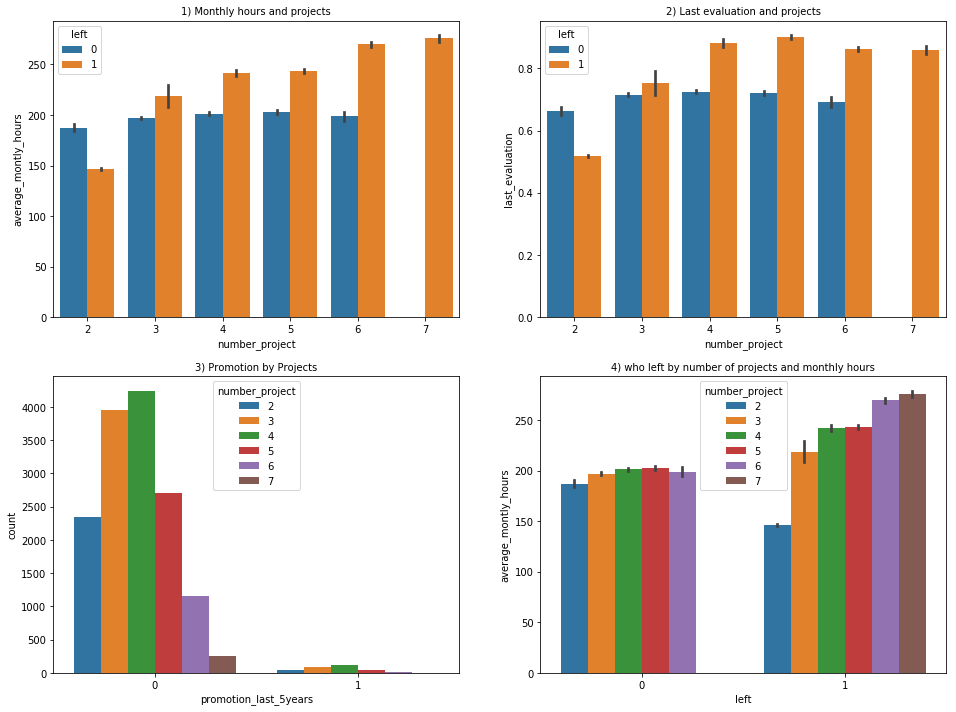

In [20]:
f,ax = plt.subplots(figsize=(16,12))
plt.subplot(2,2,1)
sns.barplot(x='number_project',y='average_montly_hours',hue='left',data=df)
plt.title('1) Monthly hours and projects',fontsize=10)

plt.subplot(2,2,2)
sns.barplot(x='number_project',y='last_evaluation',hue='left',data=df)
plt.title('2) Last evaluation and projects',fontsize=10)

plt.subplot(2,2,3)
sns.countplot(x='promotion_last_5years',hue='number_project',data=df)
plt.title('3) Promotion by Projects',fontsize=10)

plt.subplot(2,2,4)
sns.barplot(x='left',y='average_montly_hours',hue='number_project',data=df)
plt.title('4) who left by number of projects and monthly hours',fontsize=10)
plt.show()

First of all "7 projects" employees left their job. What about them? They have been evaluated with a high score (not the highest). They had the biggest number of monthly hours of work. That means a lot of work for several projects to be done.

Employees with 4 to 6 projects are in the same situation. Very high evaluation scores, a lot of working hours every month and finally they made the choice to leave. These hard working men and women, did they been promoted? I guess the answer is "No" according to the ​plot (3).



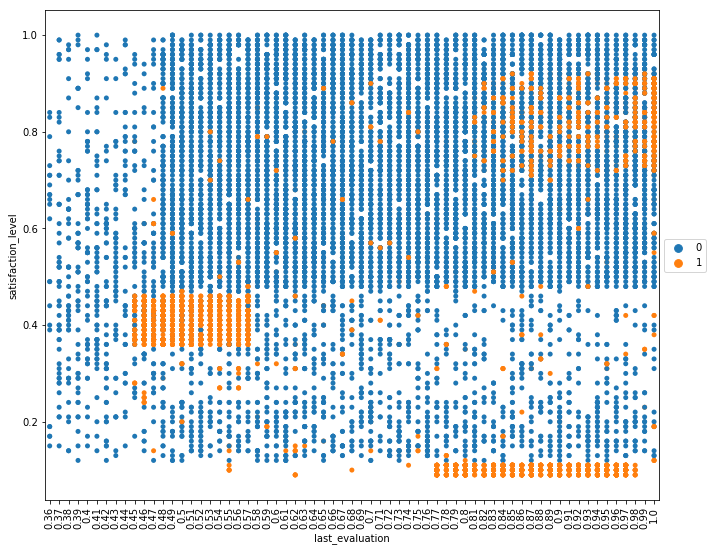

In [21]:
#Satisfaction vs Evaluation
f,ax = plt.subplots(figsize=(11,9))
sns.stripplot(x='last_evaluation',y='satisfaction_level',hue='left',data=df)
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

According to this chart employees are divided into 3 catagories:<br>
1) Ambitious <br>
2) Ethical <br>
3) Disappointed

In [22]:
groupby_left = df[['satisfaction_level','left']].groupby(['left'],as_index=False).mean()
groupby_left['counts'] = df['left'].value_counts()

In [23]:
groupby_left

,left,satisfaction_level,counts
0,0,0.666810,11428
1,1,0.440098,3571


In [24]:
#Ambitious

amb = pd.DataFrame()
amb = df.loc[(df['satisfaction_level']>0.6) & (df['last_evaluation']>0.8) & (df['left']==1)]
print('ambitous = ' ,len(amb))

#Ethical
eth = pd.DataFrame()
eth = df.loc[(df['satisfaction_level']>=0.36)&(df['satisfaction_level']<=0.46)
             &(df['last_evaluation']<0.58)&(df['left']==1)]
print('Ethical = ',len(eth))

#Disappointed
      
dis=pd.DataFrame()
dis=df.loc[np.where((df['satisfaction_level']<0.12)&(df['last_evaluation']>0.76)&(df['left']==1))]
print('disappointed =',len(dis))

('ambitous = ', 908)
('Ethical = ', 1523)
('disappointed =', 879)


In [25]:
means = pd.concat([df.mean(),amb.mean(),eth.mean(),dis.mean()],axis=1)
means.columns = ['all_employees','ambitious','ethical','disappointed']
means.drop(means.index[6])
means

,all_employees,ambitious,ethical,disappointed
satisfaction_level,0.612834,0.816244,0.408286,0.101604
last_evaluation,0.716102,0.923756,0.510722,0.872389
number_project,3.803054,4.566079,2.011819,6.216155
average_montly_hours,201.050337,244.116740,144.292843,276.863481
time_spend_company,3.498233,5.131057,3.001970,4.095563
Work_accident,0.144610,0.050661,0.047275,0.044369
left,0.238083,1.000000,1.000000,1.000000
promotion_last_5years,0.021268,0.001101,0.007879,0.003413


In [26]:
for j in ('ambitious','ethical','disappointed'):
    o=0
    u=0
    print(j)
   
    for i in range(len(means)):
        if means['all_employees'][i]>means[j][i]:
            print(means.index[i],'->','under average')
            u+=1
        else:
            print(means.index[i],'->','over average')
            o+=1
    print('\n')
    print('over = ',o,'under = ',u)
    print('\n')

ambitious
('satisfaction_level', '->', 'over average')
('last_evaluation', '->', 'over average')
('number_project', '->', 'over average')
('average_montly_hours', '->', 'over average')
('time_spend_company', '->', 'over average')
('Work_accident', '->', 'under average')
('left', '->', 'over average')
('promotion_last_5years', '->', 'under average')


('over = ', 6, 'under = ', 2)


ethical
('satisfaction_level', '->', 'under average')
('last_evaluation', '->', 'under average')
('number_project', '->', 'under average')
('average_montly_hours', '->', 'under average')
('time_spend_company', '->', 'under average')
('Work_accident', '->', 'under average')
('left', '->', 'over average')
('promotion_last_5years', '->', 'under average')


('over = ', 1, 'under = ', 7)


disappointed
('satisfaction_level', '->', 'under average')
('last_evaluation', '->', 'over average')
('number_project', '->', 'over average')
('average_montly_hours', '->', 'over average')
('time_spend_company', '->', 'over ave

First "Ambitious". I named this category "ambitious" because employees in this category have all their stats over the average. They have high satisfaction level and evaluation score.They have accomplished, almost, 1 more project than the average, they work a lot every month. They did overtime work. They stayed at their position for 5 years! But what they didn't have? They didn't have any promotion over the last 5 years. Great stuff but they had to deploy their talent.

Second "Ethical". This category is kinda mysterious. "Ethical" employees have no stats over the average. Are they underqualified? Maybe yes or maybe not. If they felt depressed or unsatisfied then perhaps they couldn't give their best of them. Low satisfaction level. A few "done" projects. Not so good for them to be every day at their work. Only 144 hours per month, when the average is 201. Of course, they didn't get any promotion the last five years because they quit their job at 3 years.

Last but not least...Disappointed. Let's start reversely. "No promotion". When you don't see your work be recognized, you feel a little disappointed. High evaluation score and a big number of projects. More than 11 hours every day at work. I think that the quite low satisfaction level is justifiable. They should try at another company, so they left their job position.

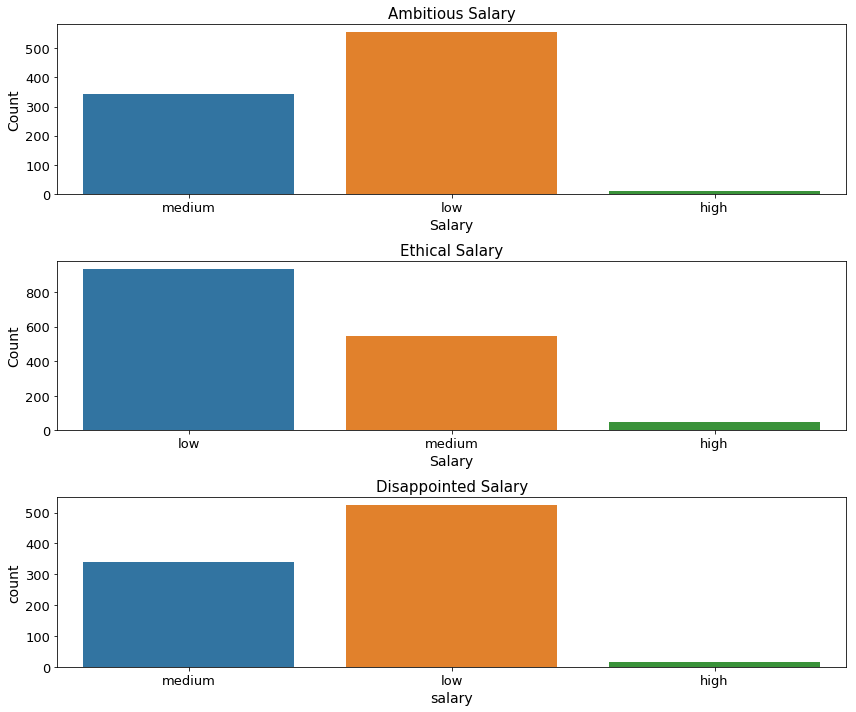

In [27]:
fig,ax=plt.subplots(figsize=(12,10))
plt.subplot(3,1,1)
sns.countplot(x='salary', data=amb)
plt.title('Ambitious Salary',fontsize=15)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.subplot(3,1,2)
sns.countplot(x='salary', data=eth)
plt.title('Ethical Salary',fontsize=15)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.subplot(3,1,3)
plt.title('Disappointed Salary',fontsize=15)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.countplot(x='salary', data=dis)
plt.tight_layout()
plt.show()

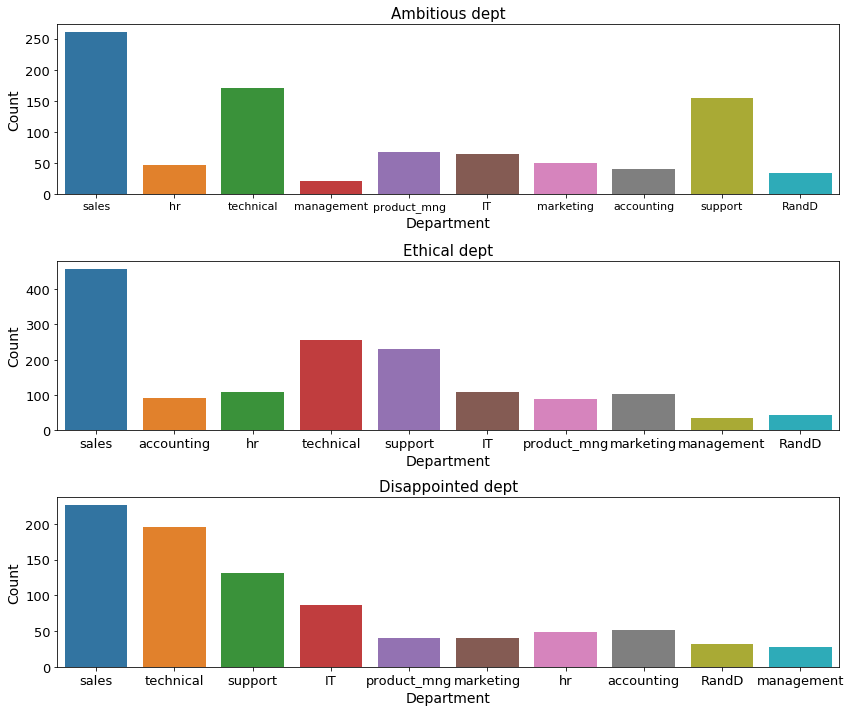

In [28]:
#Department Over Catagories
fig,ax=plt.subplots(figsize=(12,10))
plt.subplot(3,1,1)
sns.countplot(x='sales', data=amb)
plt.title('Ambitious dept',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.subplot(3,1,2)
sns.countplot(x='sales', data=eth)
plt.title('Ethical dept',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.subplot(3,1,3)
sns.countplot(x='sales', data=dis)
plt.title('Disappointed dept',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

Sales, Technical and Support have the maximum number of employee leakage.

## Trying with Logistic Regression

In [29]:
log_df = df

In [30]:
log_df_dummies = pd.get_dummies(log_df['salary'])

In [31]:
log_df['low'] = log_df_dummies['low']
log_df['high'] = log_df_dummies['high']
log_df['medium'] = log_df_dummies['medium']
log_df.drop(columns='salary',inplace=True)

In [32]:
log_df_sales = pd.get_dummies(log_df['sales'])

In [33]:
log_df['IT'] = log_df_sales['IT']
log_df['RandD'] = log_df_sales['RandD']
log_df['hr'] = log_df_sales['hr']
log_df['management'] = log_df_sales['management']
log_df['marketing']= log_df_sales['marketing']
log_df['product_mng']= log_df_sales['product_mng']
log_df['sales']= log_df_sales['sales']
log_df['support']= log_df_sales['support']
log_df['technical']= log_df_sales['technical']

In [34]:
log_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,low,high,medium,IT,RandD,hr,management,marketing,product_mng,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=log_df.drop(columns='left')
y=df['left']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      3431
          1       0.60      0.35      0.44      1069

avg / total       0.77      0.79      0.77      4500



In [46]:
confusion_matrix(y_test,predictions)

array([[3185,  246],
       [ 700,  369]])

### Trying with DecisionTree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
dtree_predict = dtree.predict(X_test)

In [55]:
print classification_report(y_test,dtree_predict)

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      3431
          1       0.94      0.98      0.96      1069

avg / total       0.98      0.98      0.98      4500



In [56]:
print confusion_matrix(y_test,dtree_predict)

[[3363   68]
 [  25 1044]]


### Trying with Random Forrest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc_df = RandomForestClassifier()

In [59]:
rfc_df.fit(X_test,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
rfc_predict =rfc_df.predict(X_test)

In [62]:
print classification_report(y_test,rfc_predict)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3431
          1       1.00      0.99      0.99      1069

avg / total       1.00      1.00      1.00      4500



In [63]:
print confusion_matrix(y_test,rfc_predict)

[[3430    1]
 [  10 1059]]


The prediction result is best with Random Forrest. Even with Decision Tree the prediction score was very high.

We used 9 features as input for the model, now lets see which of them are more important.

In [80]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_importance = rf.feature_importances_

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_importance = dt.feature_importances_

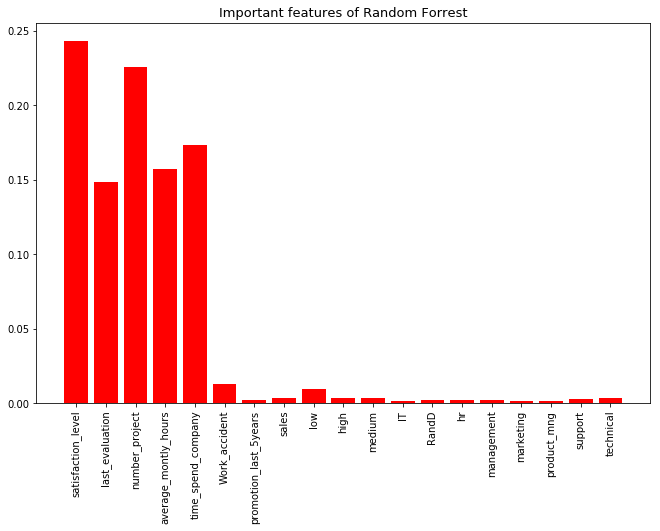

In [83]:
plt.figure(figsize=(11,7))
plt.title("Important features of Random Forrest",fontsize=13)
plt.bar(range(X_train.shape[1]),rf_importance,color = 'r',align = 'center')
plt.xticks(range(X_train.shape[1]),X_train.columns)
plt.xticks(rotation=90)
plt.show()

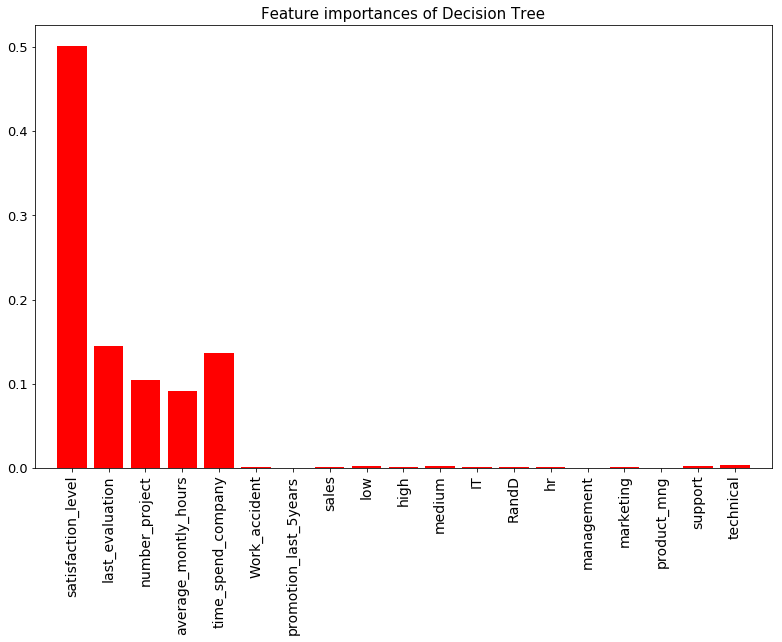

In [86]:
plt.figure(figsize=(11,7))
plt.title("Feature importances of Decision Tree",fontsize=15)
plt.bar(range(X_train.shape[1]), dt_importance, color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns,fontsize=14)
plt.yticks(fontsize=13)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Satisfaction level is the most important feature amongst all with  more then 35% in Random Forrest model. Followed by time spend in company and number of projects